# Final Portfolio Project: End-to-End Machine Learning
**Name:** Prajita Banjara  
**Student ID:** 2513644  
**Module:** 5CS037 Concepts and Technologies of AI

## Introduction
This portfolio implements machine learning tasks:
1. **Classification:** Predicting obesity levels in individuals based on their eating habits and physical condition.

In [ ]:
# --- CELL 1: Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn for Preprocessing and Model Selection
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_regression

# Sklearn Models
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Sklearn Metrics
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix

# Set style for plots
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore') # Suppress warnings for cleaner output

# Part 2: Classification Task (Obesity Risk)
**Goal:** Classify individuals into obesity levels (e.g., Normal, Overweight, Obesity Type I) based on lifestyle factors.

### 2.1 Data Loading
Loading the dataset and checking for unique classes in the target variable `NObeyesdad`.

In [2]:
import pandas as pd
# --- CELL 7: Load Obesity Data (Classification) ---
df_obesity = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

print("Obesity Data Loaded Successfully:")
display(df_obesity.head())
print("\nUnique Classes:", df_obesity['NObeyesdad'].unique())

Obesity Data Loaded Successfully:


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II



Unique Classes: ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


### 2.2 Exploratory Data Analysis (EDA)
Checking for class balance and relationships between weight and obesity levels.

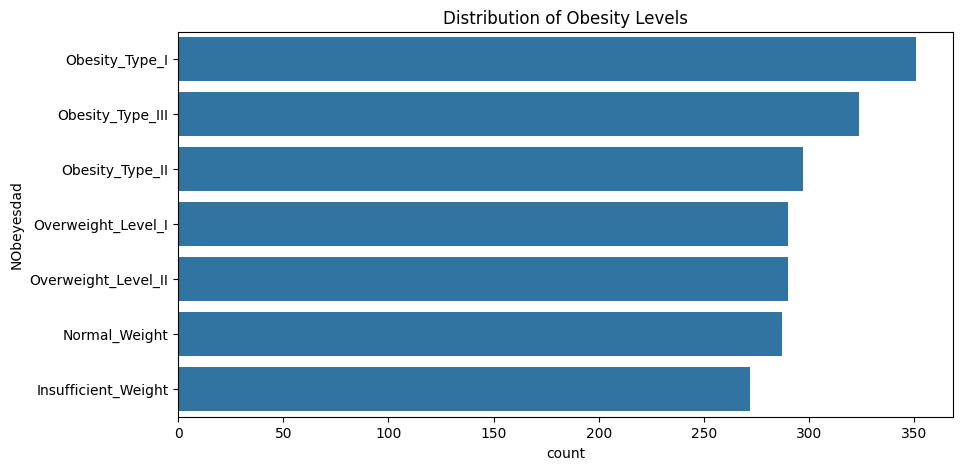

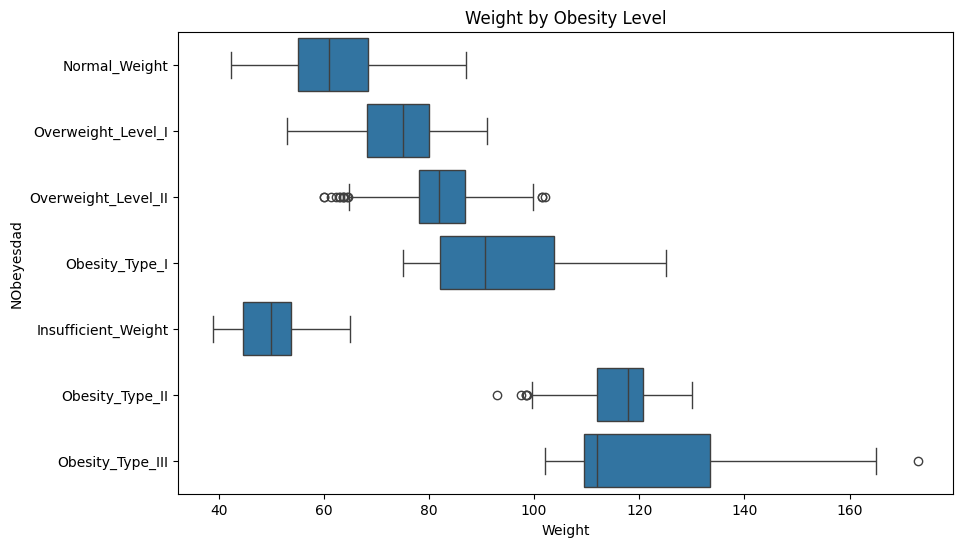

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
# --- CELL 8: Classification EDA ---
# 1. Target Class Distribution
plt.figure(figsize=(10, 5))
sns.countplot(y='NObeyesdad', data=df_obesity, order=df_obesity['NObeyesdad'].value_counts().index)
plt.title('Distribution of Obesity Levels')
plt.show()

# 2. Weight vs Obesity Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='Weight', y='NObeyesdad', data=df_obesity)
plt.title('Weight by Obesity Level')
plt.show()

### 2.3 Data Preprocessing
1. Separating features and target.
2. Using a **ColumnTransformer** to scale numerical data and OneHotEncode categorical text data.
3. Splitting the data using `stratify` to maintain class balance in the test set.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# --- CELL 9: Classification Preprocessing ---
X_cls = df_obesity.drop('NObeyesdad', axis=1)
y_cls = df_obesity['NObeyesdad']

# Identify column types
cat_cols_cls = X_cls.select_dtypes(include=['object']).columns
num_cols_cls = X_cls.select_dtypes(exclude=['object']).columns

# Create Transformer
# StandardScale numbers, OneHotEncode text categories
preprocessor_cls = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols_cls),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols_cls)
    ])

# Split Data (Stratify ensures all classes are represented in train/test)
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls
)

# Apply Transformations
X_train_cls_scaled = preprocessor_cls.fit_transform(X_train_cls)
X_test_cls_scaled = preprocessor_cls.transform(X_test_cls)

print("Data scaled and split for Classification.")

Data scaled and split for Classification.



### 2.4 Model Building
Training three classification models:
1. **Neural Network (MLPClassifier)**
2. **Random Forest Classifier**
3. **K-Nearest Neighbors (KNN)**

In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# --- CELL 10: Classification Model Training ---

# 1. Neural Network (MLP Classifier)
nn_cls = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
nn_cls.fit(X_train_cls_scaled, y_train_cls)
y_pred_nn_c = nn_cls.predict(X_test_cls_scaled)

# 2. Random Forest
rf_cls = RandomForestClassifier(n_estimators=100, random_state=42)
rf_cls.fit(X_train_cls_scaled, y_train_cls)
y_pred_rf_c = rf_cls.predict(X_test_cls_scaled)

# 3. K-Nearest Neighbors (KNN)
knn_cls = KNeighborsClassifier(n_neighbors=5)
knn_cls.fit(X_train_cls_scaled, y_train_cls)
y_pred_knn_c = knn_cls.predict(X_test_cls_scaled)

print("--- Classification Accuracy ---")
print(f"Neural Network: {accuracy_score(y_test_cls, y_pred_nn_c):.4f}")
print(f"Random Forest:  {accuracy_score(y_test_cls, y_pred_rf_c):.4f}")
print(f"KNN:            {accuracy_score(y_test_cls, y_pred_knn_c):.4f}")

--- Classification Accuracy ---
Neural Network: 0.9527
Random Forest:  0.9362
KNN:            0.8251


### 2.5 Optimization and Final Evaluation
Refining the Random Forest model using Grid Search to find the best parameters and printing a detailed Classification Report.

Best RF Parameters: {'criterion': 'entropy', 'max_depth': None, 'n_estimators': 100}

--- Final Classification Report ---
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.93      0.96        54
      Normal_Weight       0.76      0.91      0.83        58
     Obesity_Type_I       0.99      0.96      0.97        70
    Obesity_Type_II       1.00      0.98      0.99        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.89      0.86      0.88        58
Overweight_Level_II       0.96      0.93      0.95        58

           accuracy                           0.94       423
          macro avg       0.94      0.94      0.94       423
       weighted avg       0.94      0.94      0.94       423



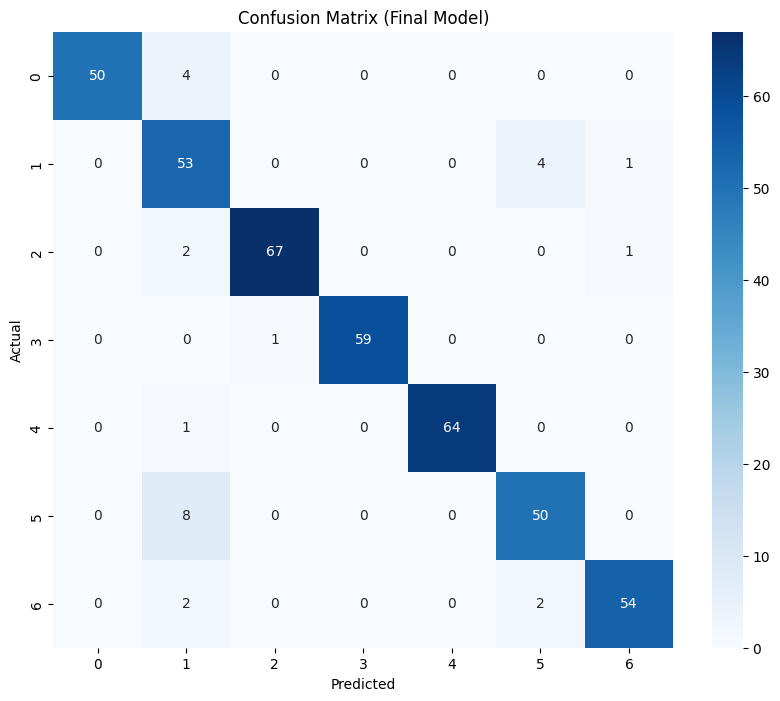

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- CELL 11: Classification Tuning & Final Report ---

# Tune Random Forest
param_grid_cls = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'criterion': ['gini', 'entropy']
}

grid_cls = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_cls, cv=3)
grid_cls.fit(X_train_cls_scaled, y_train_cls)

best_rf_cls = grid_cls.best_estimator_
y_pred_final_cls = best_rf_cls.predict(X_test_cls_scaled)

print("Best RF Parameters:", grid_cls.best_params_)
print("\n--- Final Classification Report ---")
print(classification_report(y_test_cls, y_pred_final_cls))

# Confusion Matrix Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test_cls, y_pred_final_cls), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Final Model)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()